## This Jupyter notebook will show you to handle 3 dimensional data (cube: lat x lon x time)

## We will load daily Chl-a data from 2009 for the Portuguese Coast:

Now, we will need to import several modules/libraries that are essential for nearly every scientific work in Python.

In [1]:
import os #change folders
import numpy as np # perform calculations and basic math
import matplotlib.pyplot as plt # plot data
import pandas as pd # work with dataframes,tables, spreadsheets, etc.
import netCDF4 as nc4 # work with netcdf files, the standard file for satellite 2D and 3D data
import cartopy #work with geographical projections and maps
#import datetime # this library is also useful for working with dates, convert dates, etc.

## First, lets load the 3D dataset using the netCDF4 module.

In [2]:
# Let's open the first image (31st August 2005)
file = 'chl_2009.nc' #write the name of the file
chl_2009 = nc4.Dataset(file, mode='r') #open the file in python
print(chl_2009.variables) # check variables

{'time': <class 'netCDF4._netCDF4.Variable'>
vlen time(time)
vlen data type: <class 'str'>
unlimited dimensions: 
current shape = (365,), 'latitude': <class 'netCDF4._netCDF4.Variable'>
float32 latitude(latitude)
    units: degrees N
unlimited dimensions: 
current shape = (216,)
filling on, default _FillValue of 9.969209968386869e+36 used, 'longitude': <class 'netCDF4._netCDF4.Variable'>
float32 longitude(longitude)
    units: degrees E
unlimited dimensions: 
current shape = (216,)
filling on, default _FillValue of 9.969209968386869e+36 used, 'Chl-a': <class 'netCDF4._netCDF4.Variable'>
float32 Chl-a(latitude, longitude, time)
    units: miligrams per cubic meter
unlimited dimensions: 
current shape = (216, 216, 365)
filling on, default _FillValue of 9.969209968386869e+36 used}


C:\Users\afons\AppData\Local\Temp/ipykernel_17916/362537336.py:4: DeprecationWarning: tostring() is deprecated. Use tobytes() instead.
  print(chl_2009.variables) # check variables


## Notice what has changed:
### * Chl-a now has an extra dimension with a lenght of 365 elements
### * We now have a new variable: time (with 365 elements)

Let's try printing the new variable

In [3]:
print(chl_2009['time'][:]) #Date in DDMMYYYY

['01012009' '02012009' '03012009' '04012009' '05012009' '06012009'
 '07012009' '08012009' '09012009' '10012009' '11012009' '12012009'
 '13012009' '14012009' '15012009' '16012009' '17012009' '18012009'
 '19012009' '20012009' '21012009' '22012009' '23012009' '24012009'
 '25012009' '26012009' '27012009' '28012009' '29012009' '30012009'
 '31012009' '01022009' '02022009' '03022009' '04022009' '05022009'
 '06022009' '07022009' '08022009' '09022009' '10022009' '11022009'
 '12022009' '13022009' '14022009' '15022009' '16022009' '17022009'
 '18022009' '19022009' '20022009' '21022009' '22022009' '23022009'
 '24022009' '25022009' '26022009' '27022009' '28022009' '01032009'
 '02032009' '03032009' '04032009' '05032009' '06032009' '07032009'
 '08032009' '09032009' '10032009' '11032009' '12032009' '13032009'
 '14032009' '15032009' '16032009' '17032009' '18032009' '19032009'
 '20032009' '21032009' '22032009' '23032009' '24032009' '25032009'
 '26032009' '27032009' '28032009' '29032009' '30032009' '31032

In [4]:
# Extracting variables
lon = np.array(chl_2009['longitude'])
lat = np.array(chl_2009['latitude'])
chl = np.array(chl_2009['Chl-a'])
dates = np.array(chl_2009['time'])

C:\Users\afons\AppData\Local\Temp/ipykernel_17916/1857800987.py:2: DeprecationWarning: `np.bool` is a deprecated alias for the builtin `bool`. To silence this warning, use `bool` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.bool_` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  lon = np.array(chl_2009['longitude'])
C:\Users\afons\AppData\Local\Temp/ipykernel_17916/1857800987.py:3: DeprecationWarning: `np.bool` is a deprecated alias for the builtin `bool`. To silence this warning, use `bool` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.bool_` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  lat = np.array(chl_2009['latitude'])
C:\Users\afons\AppData\Local\Temp/ipykernel_17916

## We now have satellite images for each day of the year 2009!
## That means we have 365 2D datasets similar to what we saw in the previous exercise

### Let's try:
* Calculating the yearly mean Chl-a map
* Calculating the average Chl-a for March
* Checking how March deviates from the yearly average

In [5]:
# Calculating the yearly average!
chl_2009mean = np.nanmean(chl, 2)
# numpy.nanmean handles missing data
# If you don't have missing data, you can use just numpy.mean
# The 2 corresponds to the dimension on which you are want to calculate the mean. We want to calculate the average
# along a period of time and time is the third dimension (LAT X LON X TIME). Remember, in python we start at 0!

C:\Users\afons\AppData\Local\Temp/ipykernel_17916/1587870304.py:2: RuntimeWarning: Mean of empty slice
  chl_2009mean = np.nanmean(chl, 2)


Plot it using Cartopy and Matplotlib!

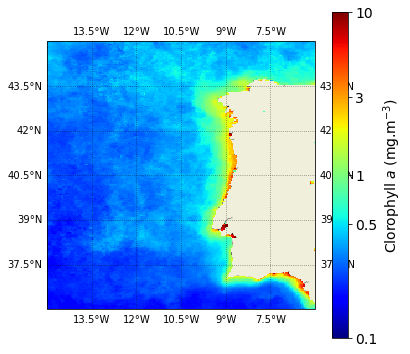

In [6]:
plt.figure(figsize=(6,6))
map = plt.axes(projection=cartopy.crs.PlateCarree())
map.coastlines(resolution='10m', color='black', linewidth=1) #add a coastline
map.set_extent([-15, -6, 36, 45]) # set the extent of the map to avoid blank spaces
map.add_feature(cartopy.feature.NaturalEarthFeature(category='physical', name='land', #add different color to land
                                                    scale='10m',
                                                    facecolor=cartopy.feature.COLORS['land']))
f1 = map.pcolormesh(lon, lat, np.log10(chl_2009mean), vmin=np.log10(0.1),
                    vmax=np.log10(10), cmap=plt.cm.jet)
gl = map.gridlines(draw_labels=True, alpha=0.5, linestyle='dotted', color='black') # Add gridlines
plt.xticks(fontsize=14) #increase size of ticks
plt.yticks(fontsize=14)
cbar = plt.colorbar(f1, ticks=[np.log10(0.1), np.log10(0.5), np.log10(1), np.log10(3), np.log10(10)]) #add a colorbar
cbar.ax.set_yticklabels(['0.1', '0.5', '1', '3', '10'], fontsize=14)
cbar.set_label('Clorophyll $\it{a}$ (mg.m$^{-3}$)', fontsize=14) #add a label to the colorbar

## Now let's the average Chl-a for March 2009

### First, we have to find which images correspond to March by looking at the time variable!

### NASA 2009 Day of the Year Calendar: https://asd.gsfc.nasa.gov/Craig.Markwardt/doy2009.html



In [10]:
# Let's try it - Remember the indices starts on 0
print(dates[59]) # 01-03-2009
print(dates[89])# 31-03-2009
# Getting chl-a data just for March

chl_March2009 = chl[:, :, 59:90] # We write 90 instead of 89 because we want to include 89 (31 March)
print(chl_March2009.shape) # Check shape to see if it's ok!

01032009
31032009
(216, 216, 31)


C:\Users\afons\AppData\Local\Temp/ipykernel_17916/3733297705.py:2: RuntimeWarning: Mean of empty slice
  chl_March2009_mean = np.nanmean(chl_March2009, 2)


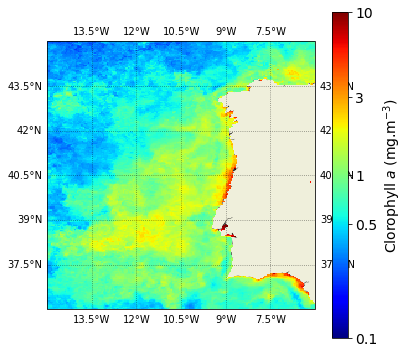

In [11]:
## Let's calculate and plot the average Chl-a during March 2009
chl_March2009_mean = np.nanmean(chl_March2009, 2)
plt.figure(figsize=(6,6))
map = plt.axes(projection=cartopy.crs.PlateCarree())
map.coastlines(resolution='10m', color='black', linewidth=1) #add a coastline
map.set_extent([-15, -6, 36, 45]) # set the extent of the map to avoid blank spaces
map.add_feature(cartopy.feature.NaturalEarthFeature(category='physical', name='land', #add different color to land
                                                    scale='10m',
                                                    facecolor=cartopy.feature.COLORS['land']))
f1 = map.pcolormesh(lon, lat, np.log10(chl_March2009_mean), vmin=np.log10(0.1),
                    vmax=np.log10(10), cmap=plt.cm.jet)
gl = map.gridlines(draw_labels=True, alpha=0.5, linestyle='dotted', color='black') # Add gridlines
plt.xticks(fontsize=14) #increase size of ticks
plt.yticks(fontsize=14)
cbar = plt.colorbar(f1, ticks=[np.log10(0.1), np.log10(0.5), np.log10(1), np.log10(3), np.log10(10)]) #add a colorbar
cbar.ax.set_yticklabels(['0.1', '0.5', '1', '3', '10'], fontsize=14)
cbar.set_label('Clorophyll $\it{a}$ (mg.m$^{-3}$)', fontsize=14) #add a label to the colorbar

## March 2009 appears to have much higher Chl-a concentrations than the average for 2009
## Let's calculate and plot the difference between the two (anomaly)

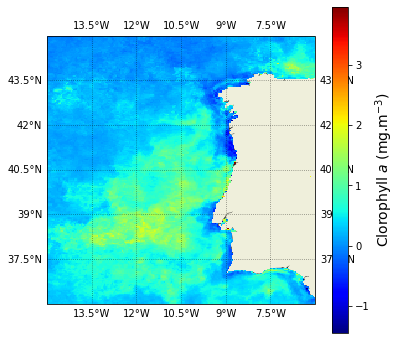

In [12]:
# Calculate the difference. When the sizes of the match, you can just subtract them
chl_March2009_anomaly = chl_March2009_mean - chl_2009mean
# Now let's plot the differences
plt.figure(figsize=(6,6))
map = plt.axes(projection=cartopy.crs.PlateCarree())
map.coastlines(resolution='10m', color='black', linewidth=1) #add a coastline
map.set_extent([-15, -6, 36, 45]) # set the extent of the map to avoid blank spaces
map.add_feature(cartopy.feature.NaturalEarthFeature(category='physical', name='land', #add different color to land
                                                    scale='10m',
                                                    facecolor=cartopy.feature.COLORS['land']))
f1 = map.pcolormesh(lon, lat, chl_March2009_anomaly, cmap=plt.cm.jet)
gl = map.gridlines(draw_labels=True, alpha=0.5, linestyle='dotted', color='black') # Add gridlines
plt.xticks(fontsize=14) #increase size of ticks
plt.yticks(fontsize=14)
cbar = plt.colorbar(f1) #add a colorbar
#cbar.ax.set_yticklabels(['0.1', '0.5', '1', '3', '10'], fontsize=14)
cbar.set_label('Clorophyll $\it{a}$ (mg.m$^{-3}$)', fontsize=14) #add a label to the colorbar


## Notice how the colorbar is not correctly alligned: 0 should at the center

## Plus, since we are looking at the difference between March and the entire year, let's choose another colormap/palette that is more suitable.

### We can see all colormaps that matplotlib offers here: https://matplotlib.org/stable/tutorials/colors/colormaps.html

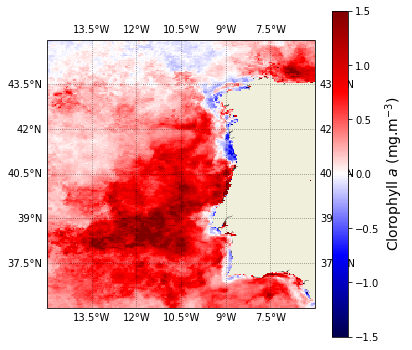

In [13]:
# Now let's plot the differences
plt.figure(figsize=(6,6))
map = plt.axes(projection=cartopy.crs.PlateCarree())
map.coastlines(resolution='10m', color='black', linewidth=1) #add a coastline
map.set_extent([-15, -6, 36, 45]) # set the extent of the map to avoid blank spaces
map.add_feature(cartopy.feature.NaturalEarthFeature(category='physical', name='land', #add different color to land
                                                    scale='10m',
                                                    facecolor=cartopy.feature.COLORS['land']))
f1 = map.pcolormesh(lon, lat, chl_March2009_anomaly, cmap=plt.cm.seismic, vmin=-1.5, vmax=1.5)
gl = map.gridlines(draw_labels=True, alpha=0.5, linestyle='dotted', color='black') # Add gridlines
plt.xticks(fontsize=14) #increase size of ticks
plt.yticks(fontsize=14)
cbar = plt.colorbar(f1) #add a colorbar
#cbar.ax.set_yticklabels(['0.1', '0.5', '1', '3', '10'], fontsize=14)
cbar.set_label('Clorophyll $\it{a}$ (mg.m$^{-3}$)', fontsize=14) #add a label to the colorbar

### Finally, let's go back to the beggining and convert the 3D data into a 1D timeseries.

## Again, let's use the upper left corner 100 pixels (as in the previous notebook)

If you remember, our chlorophyll-a data for 2009 now has the following dimensions: Lat X Lon X Time (216 X 216 X 365)

Therefore, we want to extract the first 10 pixels of latitude and longitude and keep the entire time dimension

In [14]:
chl_2009_subset = chl[0:10, 0:10, :] #notice how we leave : in the third dimension (time)
print(chl_2009_subset.shape) # 10 * 10 * 365 pixels

# Calculate the spatial average within this 10 X 10 pixel box to get a 1D dataset
chl_2009_subset_1D = np.nanmean(chl_2009_subset, (0,1)) # Now we want to average spatially (first and second dimension)
print(chl_2009_subset_1D.shape) # 365 pixels

(10, 10, 365)
(365,)


C:\Users\afons\AppData\Local\Temp/ipykernel_17916/3703276186.py:5: RuntimeWarning: Mean of empty slice
  chl_2009_subset_1D = np.nanmean(chl_2009_subset, (0,1)) # Now we want to average spatially (first and second dimension)


# And plot using what we learned from the first jupyter notebook of the class!

Text(0.5, 1.0, '2009 Chl-$\\it{a}$')

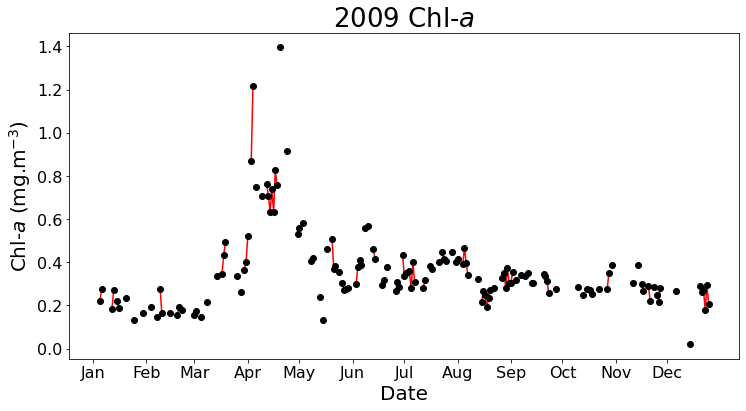

In [15]:
plt.figure(figsize=(12,6))
#plt.plot(pixel1_chla, c='r', label='Pixel 1')
#plt.plot(chl_2009_subset_1D, c='b', linestyle='--', label='Pixel 2')
plt.plot(chl_2009_subset_1D, c='r', linestyle='-', marker='o', markerfacecolor='k', markeredgecolor='k')
plt.xlabel('Date', fontsize=20)
plt.ylabel('Chl-$\it{a}$ (mg.m$^{-3}$)', fontsize=20)
plt.yticks(fontsize=16)
plt.xticks(ticks= [0, 31, 59, 90, 120, 151, 181, 212, 243, 273, 304, 334],
           labels=['Jan', 'Feb', 'Mar', 'Apr', 'May', 'Jun', 'Jul', 'Aug', 'Sep', 'Oct', 'Nov', 'Dec'], fontsize=16)
#plt.xlim(0,len(pixel1_chla))
#plt.ylim(0, 2)
plt.title('2009 Chl-$\it{a}$', fontsize=26)
#plt.legend(loc=0, fontsize=14)
#plt.tight_layout()

## Notice the missing data and the spring bloom.